In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from textblob import TextBlob 
import numpy as np
import re
import nltk
nltk.download('stopwords')

from gensim.parsing.porter import PorterStemmer
from gensim.utils import tokenize

from nltk.corpus import stopwords
stopwords = [word for word in stopwords.words('english')]
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASJID\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
url = "features_polarity_sum.csv"
data=pd.read_csv(url,low_memory = False)
data.head()

,Link,Name,polarity,battery_polarity,display_polarity,storage_polarity,camera_polarity,battery_sum,display_sum,storage_sum,camera_sum,label
0,https://www.gsmarena.com/acer_chromebook_tab_1...,Acer Chromebook Tab 10,"[1, 0, -1, 0, 0, 0, -1]",[0],"[1, 0, 0, -1, 0, 0]","[0, -1, -1]",[0],0,0,-1,0,-1
1,https://www.gsmarena.com/acer_iconia_talk_s-83...,Acer Iconia Talk S,"[1, 1, 1, -1, -1, -1, 1, -1]","[1, 1]",[1],"[1, 1, 1, 1]","[-1, -1, -1, -1, 1, 0]",1,1,1,-1,1
2,https://www.gsmarena.com/acer_liquid_z6_plus-8...,Acer Liquid Z6 Plus,"[0, 1, -1, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, 1, 1, 0, 1]","[1, 0]","[-1, 0]",0,1,1,-1,1
3,https://www.gsmarena.com/acer_liquid_z6-8304.php,Acer Liquid Z6,"[0, 1, 1]",[1],"[0, 0, 0, 1, 1]","[1, 1]",[0],1,1,1,0,1
4,https://www.gsmarena.com/acer_iconia_tab_10_a3...,Acer Iconia Tab 10 A3-A40,"[1, 1, 0, 1, 1]","[1, 1]","[1, 1, 1]","[1, 1, 1, 0]",[0],1,1,1,0,1


In [3]:
# data1 = data['battery_sum'],data['display_sum'],data['storage_sum'],data['camera_sum']
data2= pd.DataFrame()
data2["battery_sum"] = data['battery_sum']
data2["display_sum"] =data['display_sum']
data2["storage_sum"]=data['storage_sum']
data2["camera_sum"] = data['camera_sum']


In [4]:
data2

,battery_sum,display_sum,storage_sum,camera_sum
0,0,0,-1,0
1,1,1,1,-1
2,0,1,1,-1
3,1,1,1,0
4,1,1,1,0
...,...,...,...,...
11056,0,0,0,0
11057,0,1,0,1
11058,0,0,0,-1
11059,0,0,1,0


In [6]:
#for spliting data
x =data2
y = data['label']


In [7]:
train_x_svm=x[:8000]
train_y_svm=y[:8000]
svm_model = SVC(kernel='linear')
svm_model.fit(train_x_svm,train_y_svm)

SVC(kernel='linear')

In [8]:
pred_x_svm=x[8000:]
pred_y_svm=y[8000:]
pred_svm=svm_model.predict(pred_x_svm)

In [11]:
svm_cf_matrix = confusion_matrix(pred_y_svm,pred_svm)
# cf_matrix
print("SVM Matrix , accuracy and f1-score\n\n")
print("Svm confusion matrix : \n",svm_cf_matrix)

print(classification_report(pred_y_svm,pred_svm))
print("Accuracy of Model : ",(accuracy_score(pred_y_svm,pred_svm)))

SVM Matrix , accuracy and f1-score


Svm confusion matrix : 
 [[ 190  176]
 [  58 2637]]
              precision    recall  f1-score   support

          -1       0.77      0.52      0.62       366
           1       0.94      0.98      0.96      2695

    accuracy                           0.92      3061
   macro avg       0.85      0.75      0.79      3061
weighted avg       0.92      0.92      0.92      3061

Accuracy of Model :  0.9235543939888925


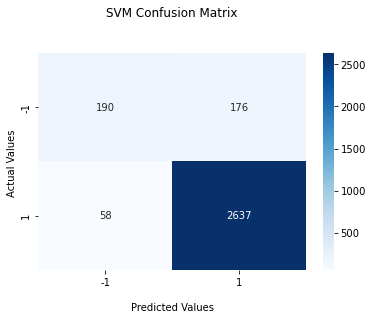

In [10]:
ax = sns.heatmap(svm_cf_matrix, annot=svm_cf_matrix,  fmt='', cmap='Blues')

ax.set_title('SVM Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['-1','1'])
ax.yaxis.set_ticklabels(['-1','1'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [198]:
# sentece="visually device is fair but if we go with cell durations that is below mark."
# url = "features_polarity_sum_model_sample.csv"
# data=pd.read_csv(url,low_memory = False)
# data.head()

In [199]:
# data_sample =pd.DataFrame()
# data_sample["battery_sum"] = data['battery_sum']
# data_sample["display_sum"] =data['display_sum']
# data_sample["storage_sum"]=data['storage_sum']
# data_sample["camera_sum"] = data['camera_sum']

In [200]:
# data_sample

In [201]:

# pred_svm=svm_model.predict(data_sample)

In [202]:
# pred_svm